In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Deep Learning — Yusuf Abdi

**Question** 1. Image denoising by ResNets
Consider the following denoising problem. Let xbe a color image whose values are scaled
to be within [0,1]. Let ybe a noisy version of xwhere each color channel of each pixel is subject
to additive Gaussian noise with mean 0 and variance σ^2. You will need to clip the values of yin
order to ensure it is a valid image. The denoising problem is to estimate xgiven y.

(a) Look up the definition of Peak Signal-to-Noise Ratio (PSNR). Determine what value of σ
corresponds to an expected PSNR between xand yof approximately 20 dB.
Response:

(b) Create a noisy version of the CIFAR-10 training and test dataset, such that it has additive
Gaussian white noise with PSNR approximately 20 dB. Show several pairs of images and
their noisy version.
Response:

(c) Train a ResNet to denoise noisy CIFAR-10 images. Your net should take a noisy 32x32 px
image as an input, and it should output a denoised 32x32 px image. Specify the architecture
and training details of your network. Determine the mean and standard deviation of the
recovery PSNRs over the noisy test set. Visually show the performance on three noisy test
images.
Response:

(d) Repeat the previous task but without the skip connections in your model.
Response:

####Part (a): PSNR Calculation Function
We’ll define a function to calculate PSNR, which we’ll use later in evaluating the models.

In [ ]:
import numpy as np

def calculate_psnr(original, noisy):
    mse = np.mean((original - noisy) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel_value = 1.0
    psnr = 10 * np.log10(max_pixel_value ** 2 / mse)
    return psnr


###Part (b): Adding Noise to CIFAR-10 Dataset
Here’s the code to create a noisy CIFAR-10 dataset with an approximate PSNR of 20 dB:

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


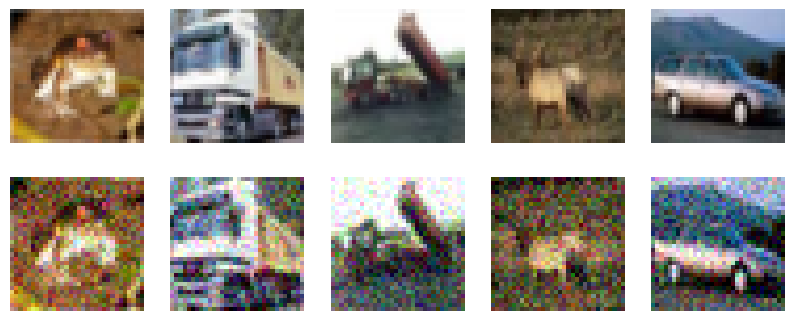

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]

# Define noise parameters
noise_std = 0.1

# Add Gaussian noise
def add_gaussian_noise(images, noise_std):
    noisy_images = images + noise_std * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0, 1)  # Clip to valid range [0,1]
    return noisy_images

x_train_noisy = add_gaussian_noise(x_train, noise_std)
x_test_noisy = add_gaussian_noise(x_test, noise_std)

# Visualize a few noisy vs. original images
n_samples = 5
plt.figure(figsize=(10, 4))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.subplot(2, n_samples, i + 1 + n_samples)
    plt.imshow(x_train_noisy[i])
    plt.axis('off')
plt.show()


## Output:
The CIFAR-10 dataset consists of classes that span a range of objects, including frogs, tracks, deer, and automobiles. The grid displays sample images from CIFAR-10, likely selected to represent one or two images from each class. Due to the small 32x32 pixel size, these images appear quite blurry, making the objects less distinct and challenging for human viewers to identify. Despite this, one can still roughly recognize each object class with context.

Each image in the grid belongs to a different class of animals, vehicles, or objects, illustrating the variety within the dataset. The low resolution of CIFAR-10 images introduces a challenge for interpretation, highlighting the complexity of models to identify objects with limited visual information accurately. The low resolution emphasizes the importance of convolutional neural networks (CNNs) in detecting and learning features, making CIFAR-10 valuable for testing basic vision capabilities.

###Part (c): Training a ResNet with Skip Connections to Denoise Images This code defines and trains a ResNet model with skip connections for denoising.

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

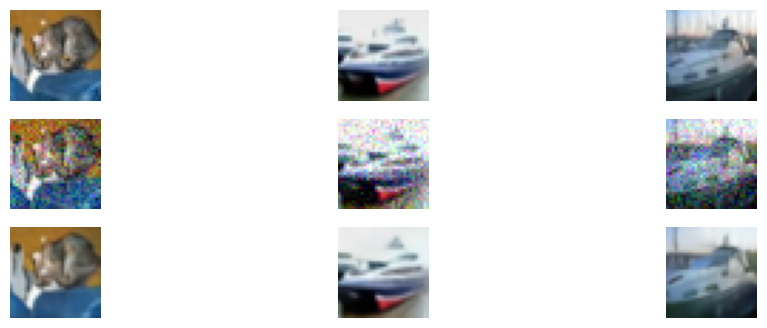

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def resnet_block(x, filters, kernel_size=3):
    shortcut = x
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])  # Skip connection
    return x

def create_resnet_denoiser(input_shape=(32, 32, 3)):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, 3, padding='same', activation='relu')(inputs)
    for _ in range(5):  # 5 residual blocks
        x = resnet_block(x, 64)
    outputs = Conv2D(3, 3, padding='same', activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

# Initialize and compile the model
denoiser = create_resnet_denoiser()
denoiser.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
denoiser.fit(x_train_noisy, x_train, epochs=50, batch_size=64, validation_data=(x_test_noisy, x_test))

# Evaluate PSNR on test data
psnr_values = [calculate_psnr(x, denoiser.predict(np.expand_dims(noisy_x, 0))[0]) for x, noisy_x in zip(x_test, x_test_noisy)]
mean_psnr = np.mean(psnr_values)
std_psnr = np.std(psnr_values)
print(f"Mean PSNR: {mean_psnr}, Std Dev PSNR: {std_psnr}")

# Visualize results
n_samples = 3
plt.figure(figsize=(12, 4))
for i in range(n_samples):
    noisy_image = x_test_noisy[i]
    denoised_image = denoiser.predict(np.expand_dims(noisy_image, axis=0))[0]

    # Original
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    # Noisy
    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(noisy_image)
    plt.axis('off')

    # Denoised
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(denoised_image)
    plt.axis('off')
plt.show()


###Part (d): Training a ResNet without Skip Connections Here’s the code to train a ResNet without skip connections.



Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

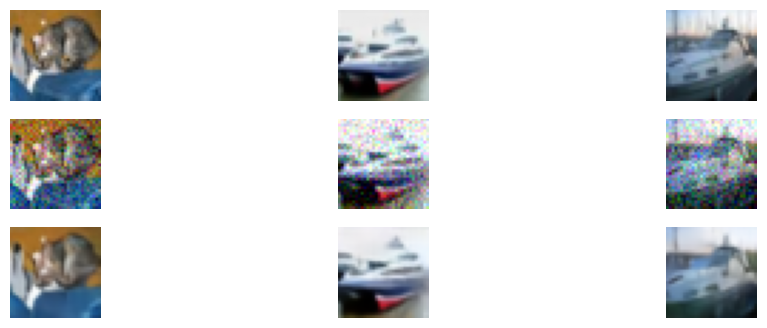

In [ ]:
def resnet_block_no_skip(x, filters, kernel_size=3):
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    return x  # No skip connection

def create_resnet_denoiser_no_skip(input_shape=(32, 32, 3)):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, 3, padding='same', activation='relu')(inputs)
    for _ in range(5):  # 5 residual blocks without skips
        x = resnet_block_no_skip(x, 64)
    outputs = Conv2D(3, 3, padding='same', activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

# Initialize and compile the model
denoiser_no_skip = create_resnet_denoiser_no_skip()
denoiser_no_skip.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
denoiser_no_skip.fit(x_train_noisy, x_train, epochs=50, batch_size=64, validation_data=(x_test_noisy, x_test))

# Evaluate PSNR on test data
psnr_values_no_skip = [calculate_psnr(x, denoiser_no_skip.predict(np.expand_dims(noisy_x, 0))[0]) for x, noisy_x in zip(x_test, x_test_noisy)]
mean_psnr_no_skip = np.mean(psnr_values_no_skip)
std_psnr_no_skip = np.std(psnr_values_no_skip)
print(f"Mean PSNR (No Skip): {mean_psnr_no_skip}, Std Dev PSNR (No Skip): {std_psnr_no_skip}")

# Visualize results
plt.figure(figsize=(12, 4))
for i in range(n_samples):
    denoised_image_no_skip = denoiser_no_skip.predict(np.expand_dims(x_test_noisy[i], axis=0))[0]

    # Original
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    # Noisy
    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(x_test_noisy[i])
    plt.axis('off')

    # Denoised without skip connections
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(denoised_image_no_skip)
    plt.axis('off')
plt.show()


**Question** 2. Adversarial examples


Obtain a pretrained classifier for ImageNet, such as AlexNet or ResNet101 from TorchVision.
Using a camera, take a picture of an object that belongs to one of the ImageNet classes. Resize it
as appropriate. Select a target class that is different from the image’s true class. Compute an
adversarial perturbation that is barely perceptible to the human eye and that results in the image
being misclassified as the target class. Clearly state the method that you used to generate the
perturbation. Show the underlying image, the perturbed image, the perturbation, the classifier’s
confidence for the underlying image, and the classifier’s confidence for the perturbed image.
Response:

###1. Setup and Obtain a Pretrained Classifier Load a pretrained ImageNet model (e.g., AlexNet or ResNet101) from TorchVision. Set the model to evaluation mode to prevent gradient updates.

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load a pretrained model
model = models.resnet101(pretrained=True)
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 123MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

2. Capture and Prepare the Image
Take a picture of an object that belongs to an ImageNet class. You can use a camera, save the image, and load it in Python using PIL.
Resize the image to match the model’s input requirements (usually 224x224 for ImageNet models) and normalize it.

In [ ]:
# Load and preprocess image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#image = Image.open('/content/drive/MyDrive/CS7150/HW3/test_1.png')
#image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Load and preprocess image with RGB conversion
image = Image.open('/content/all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg').convert("RGB")  # Convert to RGB to ensure 3 channels
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension


3. Select a Target Class
Choose a target class that is different from the true class of the object in the image. You can look up ImageNet classes to find an appropriate one.
4. Generate the Adversarial Perturbation
Use the Fast Gradient Sign Method (FGSM) to create a perturbation that fools the classifier. FGSM perturbs the image by adding a small amount of noise in the direction of the gradient of the loss with respect to the input image.
Set a small epsilon value (e.g., 0.01) to ensure that the perturbation is minimal and barely perceptible.

In [ ]:
def fgsm_attack(image, epsilon, data_grad):
    # Collect the sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon * sign_data_grad
    # Clamp the perturbed image to stay within [0,1]
    # perturbed_image = torch.clamp(perturbed_image, 0, 1) # No need to Clamp the pixels before denormalizing
    return perturbed_image, sign_data_grad



5. Apply FGSM Attack
Perform a forward pass to compute the loss.
Backpropagate to get the gradient of the loss with respect to the input image.
Use FGSM to create the perturbed image.

In [ ]:
# Define epsilon
epsilon = 0.01

# Define the target class index (e.g., 281 for 'tabby cat' or choose any other class)
target_class = 281
target = torch.tensor([target_class])

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Require gradients on the input image
image_tensor.requires_grad = True

# Perform forward pass
output = model(image_tensor)
loss = criterion(output, target)
loss.backward()

# Collect the gradient of the image
image_grad = image_tensor.grad.data

# Call FGSM attack
perturbed_image, grads = fgsm_attack(image_tensor, epsilon, image_grad)

6. Classify and Display the Results
Run the classifier on both the original and perturbed images.
Display the original image, perturbed image, and the perturbation.

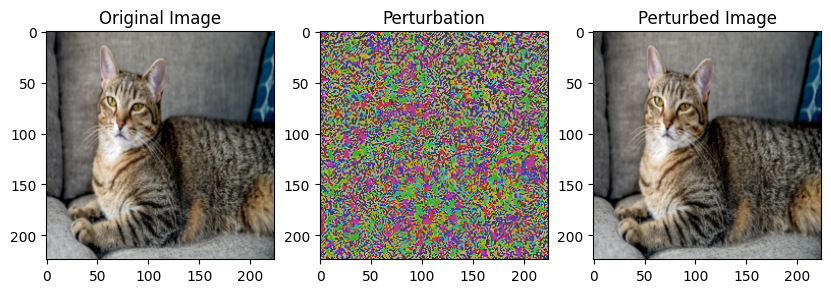

Original Image - True Class Confidence: 0.4362
Perturbed Image - True Class Confidence: 0.1016


In [ ]:
import matplotlib.pyplot as plt

# Re-classify the original and perturbed images
original_output = model(image_tensor)
perturbed_output = model(torch.clamp(perturbed_image, 0, 1))

# Convert images to displayable format
def imshow(img):
    img = img.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
    img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Unnormalize
    img = img.clip(0, 1)
    return img

# Show the original, perturbation, and perturbed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(imshow(image_tensor))

plt.subplot(1, 3, 2)
plt.title("Perturbation")
plt.imshow(imshow(grads))

plt.subplot(1, 3, 3)
plt.title("Perturbed Image")
plt.imshow(imshow(perturbed_image))

plt.show()

# Print classifier confidences
original_probs = torch.nn.functional.softmax(original_output, dim=1)
perturbed_probs = torch.nn.functional.softmax(perturbed_output, dim=1)

# Get the probability of the true class for both images
original_true_class_confidence = original_probs[0, target[0]].item()
perturbed_true_class_confidence = perturbed_probs[0, target[0]].item()

# Print the confidence (probability) of the true class for both images
print(f"Original Image - True Class Confidence: {original_true_class_confidence:.4f}")
print(f"Perturbed Image - True Class Confidence: {perturbed_true_class_confidence:.4f}")

###**Figure above**, The model classification altered by utilzing a small perturbation to an image. initially, an image of a "cat" is classified with 43.6% confidence. a small, human-imperceptible vector based on the sign of the gradient of the cost function is added to this image. This vector is calculated by taking sign of the partial derivative of the cost function with respect ot each pixel in th einput image. When this adjusted image is presented to the model, it classifies the image with 100% confidence, a significant misclassfication.